In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import joypy
import matplotlib.pyplot as plt
import adjustText as aT
path_stata_input = '/Users/sophieayling/Library/CloudStorage/GoogleDrive-sophie2ayling@gmail.com/My Drive/PhD/08_Fieldwork/08_Data/R8_data/stata_input/'
path_plots = '/Users/sophieayling/Library/CloudStorage/GoogleDrive-sophie2ayling@gmail.com/My Drive/PhD/08_Fieldwork/08_Data/R8_data/plots/lshtm/'
path_plots_final = '/Users/sophieayling/Library/CloudStorage/GoogleDrive-sophie2ayling@gmail.com/My Drive/PhD/08_Fieldwork/08_Data/R8_data/plots/final_paper/'


Box plots (by age, ses, occ_2)

In [2]:
# load data (replace with your own dataset)
r8 = pd.read_stata(path_stata_input+'IVQ_R8_newVars_200cutoff.dta')
r8_long=pd.read_stata(path_stata_input+'ind_contacts_by_place_py_max200.dta')
#print cols starting with tot_contacts
prefix = 'tot_contacts'
matching_cols = [col for col in r8.columns if col.startswith(prefix)]
# Print the matching columns
#print(matching_cols)
r8_long.head()

,hhmem_key,place_mergeable,contacts_in_place_nld,contacts_in_place_ld,diff_contacts_ld,tot_contacts_wk_nld,tot_contacts_wk_ld,diff_all_places_ld,gender,age,age_5,occupations,site_type,ses,ses_5,occ_2,place_ld_stat,pop_contacts_by_place_nld
0,200196001,home,1.0,0.0,-1.0,88.0,107.0,-19.0,male,44,30-44 yrs,"1. Estates: tea, coffee, forestry",3. agri estate,0.527778,4.0,manual labor,ld - home,1.0
1,200196001,work,87.0,78.0,-9.0,88.0,107.0,-19.0,male,44,30-44 yrs,"1. Estates: tea, coffee, forestry",3. agri estate,0.527778,4.0,manual labor,ld - work,87.0
2,200196001,school,NaN,NaN,NaN,88.0,107.0,-19.0,male,44,30-44 yrs,"1. Estates: tea, coffee, forestry",3. agri estate,0.527778,4.0,manual labor,ld - school,0.0
3,200196001,transport,0.0,29.0,29.0,88.0,107.0,-19.0,male,44,30-44 yrs,"1. Estates: tea, coffee, forestry",3. agri estate,0.527778,4.0,manual labor,ld - transport,0.0
4,200196001,entertainment,0.0,0.0,0.0,88.0,107.0,-19.0,male,44,30-44 yrs,"1. Estates: tea, coffee, forestry",3. agri estate,0.527778,4.0,manual labor,ld - entertainment,0.0


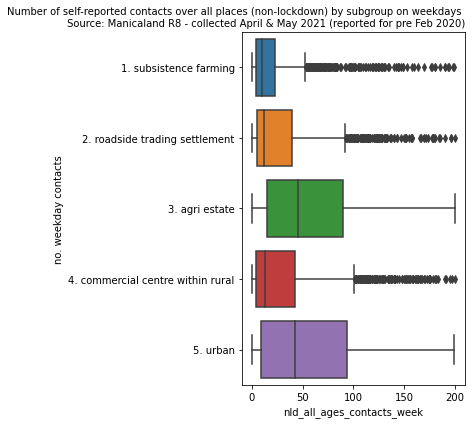

In [3]:
#one more for site type 
fig, ax = plt.subplots (figsize = (6, 6))
sns.boxplot(x="nld_all_ages_contacts_week", 
            y="site_type", 
            data=r8, 
           ax=ax)
ax.set_title("Number of self-reported contacts over all places (non-lockdown) by subgroup on weekdays \n Source: Manicaland R8 - collected April & May 2021 (reported for pre Feb 2020)", loc='right', fontsize=10)
ax.set_ylabel('no. weekday contacts')
plt.tight_layout()
plt.savefig(path_plots+'boxplots_site_type.png', dpi=300)


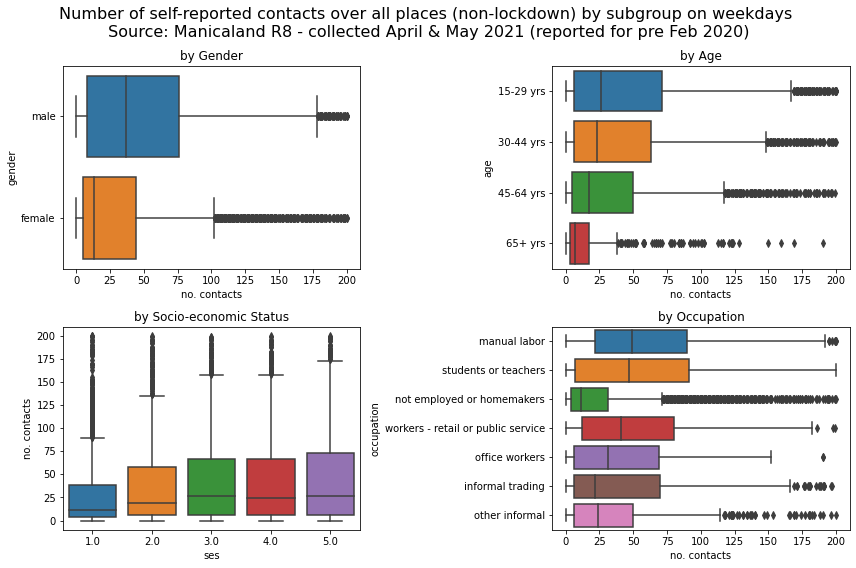

In [4]:

# create a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
# plot a boxplot in each subplot
sns.boxplot(x="nld_all_ages_contacts_week", y="occ_2", data=r8, ax=axes[1,1])
sns.boxplot(x="nld_all_ages_contacts_week", y="age_5", data=r8, ax=axes[0,1])
sns.boxplot(x="nld_all_ages_contacts_week", y="gender", data=r8, ax=axes[0,0])
sns.boxplot(x="ses_5", y="nld_all_ages_contacts_week", data=r8, ax=axes[1,0])

# set titles for each subplot
axes[0,0].set(title="by Gender", ylabel='gender', xlabel='no. contacts')
axes[0,1].set(title="by Age",  ylabel='age', xlabel='no. contacts')
axes[1,0].set(title="by Socio-economic Status",  xlabel='ses', ylabel='no. contacts')
axes[1,1].set(title="by Occupation",  ylabel='occupation', xlabel='no. contacts')
ax.tick_params(axis='y', labelsize=12)

# add overall title to the group of subplots
fig.suptitle("Number of self-reported contacts over all places (non-lockdown) by subgroup on weekdays \n Source: Manicaland R8 - collected April & May 2021 (reported for pre Feb 2020) ", fontsize=16)



# use adjust text function 
plt.tight_layout()
# export
plt.savefig(path_plots+'boxplots_all_contacts_by_subgroup.png', dpi=300)


### Kdensity subplots

<AxesSubplot:xlabel='m_tot_contacts_trans_wk_nld', ylabel='Density'>

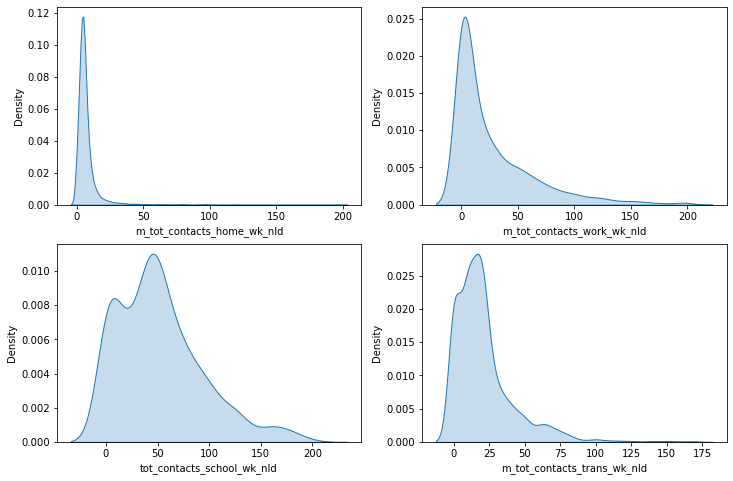

In [5]:

# create a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
# Create the plot
sns.kdeplot(x='m_tot_contacts_home_wk_nld', data=r8, shade=True, ax=axes[0,0])
sns.kdeplot(x='m_tot_contacts_work_wk_nld', data=r8, shade=True, ax=axes[0,1])
sns.kdeplot(x='tot_contacts_school_wk_nld', data=r8, shade=True, ax=axes[1,0])
sns.kdeplot(x='m_tot_contacts_trans_wk_nld', data=r8, shade=True, ax=axes[1,1])



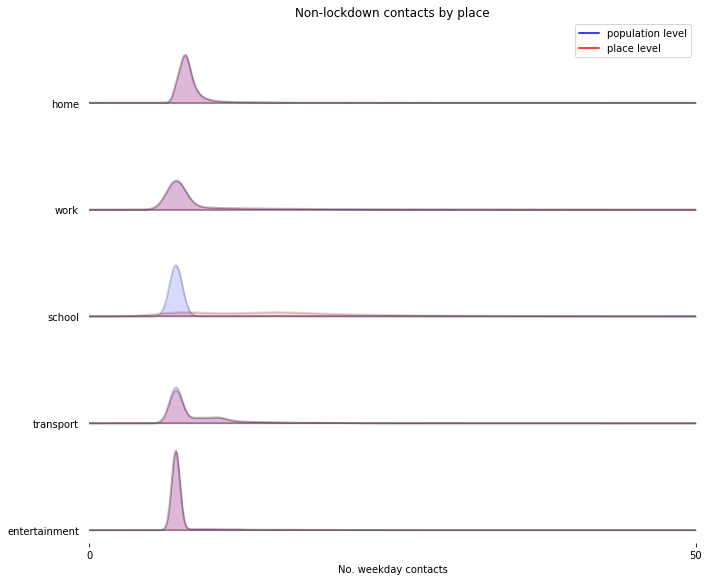

In [6]:
# overlap the plots 

# Define line colors corresponding to each plot
line_colors = ['blue', 'red']  


# Set the background color
ax.set_facecolor('white')
fig, axes = joypy.joyplot(r8_long, 
                          by='place_mergeable', 
                          column=['pop_contacts_by_place_nld','contacts_in_place_nld'],
                          #ylim='own',
                          alpha=0.15,
                          figsize=(10,8),
                          color=line_colors)
                        
# Customize the line color and width for each joyplot
for ax in axes:
    for line in ax.get_lines():
        line.set_linewidth(2)  # Set the line width to make the lines bold
        line.set_color('black')  # Set the line color to black

# Add labels and title
plt.xlabel('No. weekday contacts')
plt.ylabel('Place')
#plt.title('K-density plots of reported Weekday Contacts by Place before Feb 2020 Lockdown\n Manicaland R8 collected April & May 2021 (reported for pre Feb 2020)')
plt.xlim([0, 50])
# use adjust text function 
plt.tight_layout()
fig.set_facecolor('white')

#add legend
blue_line = plt.Line2D([0], [0], color='blue', label='population level')
red_line = plt.Line2D([0], [0], color='red', label='place level')
plt.legend(handles=[blue_line, red_line], loc='upper right')


plt.title('Non-lockdown contacts by place', pad=0.5) #lower number means more visible


# export
plt.savefig(path_plots_final+'kdens_contacts_overlay_by_place.png', dpi=300)

# do a separate plot with the no zero values in each category and plot side by side 

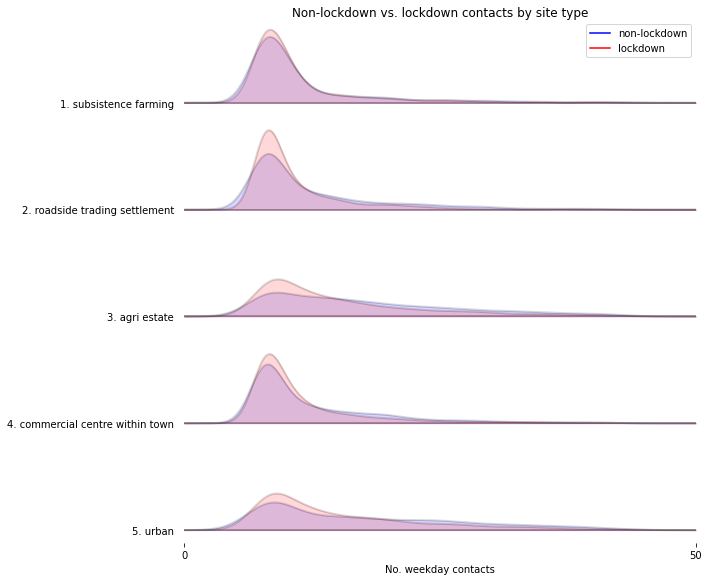

In [7]:
# Do the plots for site type ld and nld 

r8['site_type']=r8['site_type'].replace('4. commercial centre within rural', '4. commercial centre within town')
# Define line colors corresponding to each plot
line_colors = ['blue', 'red']  


# Set the background color
ax.set_facecolor('white')
fig, axes = joypy.joyplot(r8, 
                          by='site_type', 
                          column=['nld_all_ages_contacts_week','ld_all_ages_contacts_week'],
                          #ylim='own',
                          alpha=0.15,
                          figsize=(10,8),
                          color=line_colors)
                        
# Customize the line color and width for each joyplot
for ax in axes:
    for line in ax.get_lines():
        line.set_linewidth(2)  # Set the line width to make the lines bold
        line.set_color('black')  # Set the line color to black

# Add labels and title
plt.xlabel('No. weekday contacts')
plt.ylabel('site type')
#plt.title('K-density plots of reported Weekday Contacts by Place before Feb 2020 Lockdown\n Manicaland R8 collected April & May 2021 (reported for pre Feb 2020)')
plt.xlim([0, 50])
# use adjust text function 
plt.tight_layout()
fig.set_facecolor('white')

#add legend
blue_line = plt.Line2D([0], [0], color='blue', label='non-lockdown')
red_line = plt.Line2D([0], [0], color='red', label='lockdown')
plt.legend(handles=[blue_line, red_line], loc='upper right')


plt.title('Non-lockdown vs. lockdown contacts by site type', pad=0.5) #lower number means more visible


# export
plt.savefig(path_plots_final+'kdens_contacts_overlay_by_site_type.png', dpi=300)

# do a separate plot with the no zero values in each category and plot side by side 

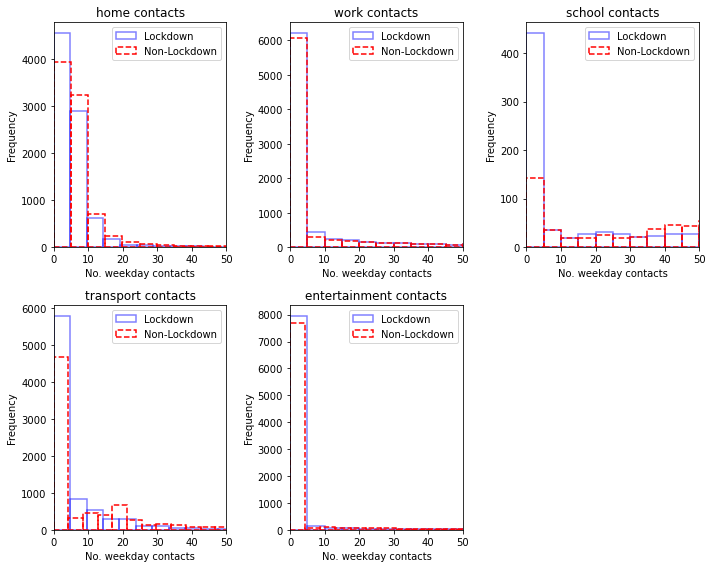

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns  # Optional, but seaborn can enhance the plot aesthetics

# Define line colors corresponding to each plot
line_colors = ['blue', 'red']

# Get unique comparison categories
comparison_categories = r8_long['place_mergeable'].unique()

# Set the background color
plt.figure(facecolor='white', figsize=(10, 8))

# Determine the number of rows and columns for subplots
num_categories = len(comparison_categories)
num_cols = num_categories // 2 + num_categories % 2  # Calculate the number of rows needed
num_rows = 2  # 2 columns for a 2x2 layout

# Loop through each comparison category and create subplots
for i, comparison_category in enumerate(comparison_categories):
    # Get data for the current comparison category
    data_ld = r8_long[(r8_long['place_mergeable'] == comparison_category)]['contacts_in_place_ld']
    data_nld = r8_long[(r8_long['place_mergeable'] == comparison_category)]['contacts_in_place_nld']
    
    # Create subplots in a variable-sized grid
    plt.subplot(num_rows, num_cols, i + 1)
    
    # Custom bin edges for each column
    bin_edges_ld = range(0,51,5)
    bin_edges_nld = range(0,51,5)
    
    # Plot histograms for population and place levels with transparent fill
    plt.hist(data_ld, bins=40, alpha=0.5, color='blue', edgecolor=line_colors[0], linestyle='-', linewidth=1.5, facecolor='none', label='Lockdown')
    plt.hist(data_nld, bins=40, alpha=1, color='red', edgecolor=line_colors[1], linestyle='--', linewidth=1.5, facecolor='none', label='Non-Lockdown')
    
    # Add labels and title for each subplot
    plt.xlabel('No. weekday contacts')
    plt.ylabel('Frequency')
    plt.title(f'{comparison_category} contacts')
    plt.xlim([0, 50])
    plt.legend()
    
    # Add a super title
   # plt.suptitle('Contacts by Place - Lockdown vs. Non-lockdown', fontsize=16)

# Tight layout and save figure
plt.tight_layout()
plt.savefig(path_plots_final + 'hist_contacts_overlay_by_place_ld_nld.png', dpi=300)
plt.show()


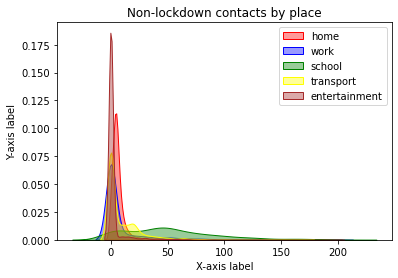

In [9]:

# Plot the area plots
sns.kdeplot(data=r8['tot_contacts_home_wk_nld'], shade=True, alpha=0.4, color='red', label='home')
sns.kdeplot(data=r8['tot_contacts_work_wk_nld'], shade=True, alpha=0.4, color='blue', label='work')
sns.kdeplot(data=r8['tot_contacts_school_wk_nld'], shade=True, alpha=0.4, color='green', label='school')
sns.kdeplot(data=r8['tot_contacts_trans_wk_nld'], shade=True, alpha=0.4, color='yellow', label='transport')
sns.kdeplot(data=r8['tot_contacts_ent_wk_nld'], shade=True, alpha=0.4, color='brown', label='entertainment')

# Add a legend and axis labels
plt.legend()
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Non-lockdown contacts by place')

# Show the plot
plt.show()



